# Finding the optimal dimension of the vocabulary

In [30]:
import build_vocabulary as bv
import features_extraction as fe
import pvml
import pandas as pd
import make_statistics as ms
numWords = []
validation_accuracy = []
false_positive_rates = []
for voc_dim in range(500, 10001, 500):
    # Get the vocabulary and the BoW representation of the training and validation set
    voc = bv.get_vocabulary(path='../dataset/', numWords=voc_dim, save=False)
    X_train, Y_train = fe.get_bow_representation(voc)
    X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                                 clickbait_path='../dataset/clickbait_validation.txt')
    # Train the model and get the accuracy on the training and validation set
    w, b = pvml.multinomial_naive_bayes_train(X_train, Y_train)

    predictions_validation, score = pvml.multinomial_naive_bayes_inference(
        X_valid, w, b)
    accuracy_validation = (predictions_validation == Y_valid).mean()

    true_positive, true_negative, false_positive, false_negative, false_positive_rate = ms.calculate_metrics(
        Y_valid, predictions_validation)
    numWords.append(voc_dim)
    validation_accuracy.append(accuracy_validation*100)
    false_positive_rates.append(false_positive_rate*100)

results = pd.DataFrame({'Vocabulary size': numWords,
                       'Validation accuracy': validation_accuracy, 'Validation FPR': false_positive_rates})
results.to_csv('../data/fpr_analysis/naive_diff_voc_size.csv')

# Naive bayes without common words 

In [27]:
import build_vocabulary as bv
import features_extraction as fe
import pvml
import pandas as pd
import make_statistics as ms


words_to_ignore = []
f = open('../data/stopwords.txt', 'r')
n = 0
for w in f.read().split():
    words_to_ignore.append(w)
    n += 1
f.close()


numWords = []
validation_accuracy = []
false_positive_rates = []
for voc_dim in range(500, 10501, 500):
    # Get the vocabulary and the BoW representation of the training and validation set
    voc = bv.get_vocabulary(path='../dataset/', numWords=voc_dim, save=False)
    voc_no_common_words = [word for word in voc if word not in words_to_ignore]

    X_train, Y_train = fe.get_bow_representation(voc_no_common_words)
    X_valid, Y_valid = fe.get_bow_representation(voc_no_common_words, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                                 clickbait_path='../dataset/clickbait_validation.txt')
    # Train the model and get the accuracy on the training and validation set
    w, b = pvml.multinomial_naive_bayes_train(X_train, Y_train)

    predictions_validation, score = pvml.multinomial_naive_bayes_inference(
        X_valid, w, b)
    accuracy_validation = (predictions_validation == Y_valid).mean()

    true_positive, true_negative, false_positive, false_negative, false_positive_rate = ms.calculate_metrics(
        Y_valid, predictions_validation)
    numWords.append(voc_dim)
    validation_accuracy.append(accuracy_validation*100)
    false_positive_rates.append(false_positive_rate*100)

results = pd.DataFrame({'Vocabulary size': numWords,
                       'Validation accuracy': validation_accuracy, 'Validation FPR': false_positive_rates})
results.to_csv('../data/fpr_analysis/naive_diff_voc_size_no_common_words.csv')

# Naive bayes with stemming

In [28]:
import build_vocabulary as bv
import features_extraction as fe
import pvml
import pandas as pd
import make_statistics as ms
numWords = []
validation_accuracy = []
false_positive_rates = []
for voc_dim in range(500, 10501, 500):
    # Get the vocabulary and the BoW representation of the training and validation set
    voc = bv.get_vocabulary(path='../dataset/', numWords=voc_dim, save=False)
    X_train, Y_train = fe.get_bow_representation(voc, stemming=True)
    X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                                 clickbait_path='../dataset/clickbait_validation.txt', stemming=True)
    # Train the model and get the accuracy on the training and validation set
    w, b = pvml.multinomial_naive_bayes_train(X_train, Y_train)

    predictions_validation, score = pvml.multinomial_naive_bayes_inference(
        X_valid, w, b)
    accuracy_validation = (predictions_validation == Y_valid).mean()

    true_positive, true_negative, false_positive, false_negative, false_positive_rate = ms.calculate_metrics(
        Y_valid, predictions_validation)
    numWords.append(voc_dim)
    validation_accuracy.append(accuracy_validation*100)
    false_positive_rates.append(false_positive_rate*100)

results = pd.DataFrame({'Vocabulary size': numWords,
                       'Validation accuracy': validation_accuracy, 'Validation FPR': false_positive_rates})
results.to_csv('../data/fpr_analysis/naive_diff_voc_size_stemming.csv')

<Axes: title={'center': 'FPR of different features'}, xlabel='Vocabulary size', ylabel='False Positive Rate (%)'>

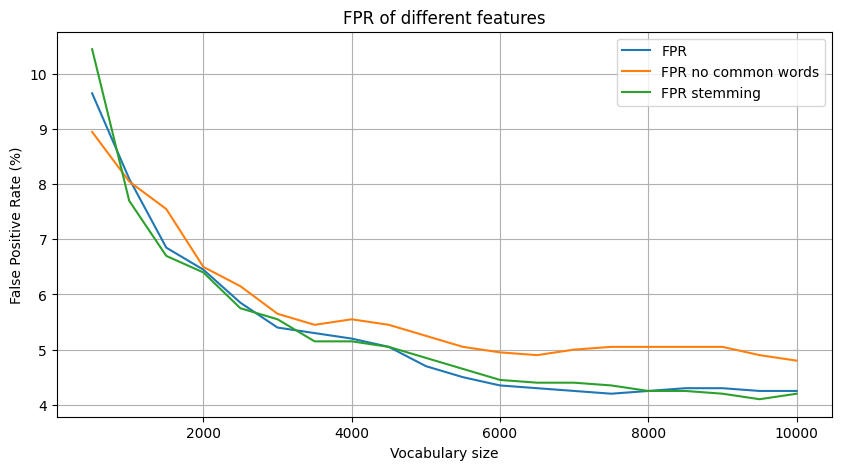

In [33]:
import pandas as pd

data = pd.read_csv('../data/fpr_analysis/naive_diff_voc_size.csv')
data_no_common = pd.read_csv('../data/fpr_analysis/naive_diff_voc_size_no_common_words.csv')
data_stemming = pd.read_csv('../data/fpr_analysis/naive_diff_voc_size_stemming.csv')
comparison = pd.DataFrame({'Vocabulary size': data['Vocabulary size'], 'FPR': data['Validation FPR'],
                          'FPR no common words': data_no_common['Validation FPR'],
                           'FPR stemming': data_stemming['Validation FPR']})


comparison.plot(kind='line', x='Vocabulary size', y=[
                'FPR', 'FPR no common words', 'FPR stemming'], figsize=(10, 5), grid=True,
                title='FPR of different features', ylabel='False Positive Rate (%)')

In [40]:
import build_vocabulary as bv
import features_extraction as fe
import pvml
import pandas as pd
import make_statistics as ms
biases = []
validation_accuracy = []
false_positive_rates = []
# Get the vocabulary and the BoW representation of the training and validation set
voc = bv.get_vocabulary(path='../dataset/', numWords=8000, save=False)
X_train, Y_train = fe.get_bow_representation(voc)
X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                             clickbait_path='../dataset/clickbait_validation.txt')
# Train the model and get the accuracy on the training and validation set
w, est_b = pvml.multinomial_naive_bayes_train(X_train, Y_train)

for b1 in range(-7, 7):
    for b2 in range(7,-7,-1):
        b = [b1, b2]
        predictions_validation, score = pvml.multinomial_naive_bayes_inference(
            X_valid, w, b)
        accuracy_validation = (predictions_validation == Y_valid).mean()

        true_positive, true_negative, false_positive, false_negative, false_positive_rate = ms.calculate_metrics(
            Y_valid, predictions_validation)
        biases.append(b)
        validation_accuracy.append(accuracy_validation*100)
        false_positive_rates.append(false_positive_rate*100)

results = pd.DataFrame({'Bias': biases,
                       'Validation accuracy': validation_accuracy, 'Validation FPR': false_positive_rates})
results.to_csv('../data/fpr_analysis/naive_diff_bias.csv')

In [1]:
import pandas as pd

data = pd.read_csv('../data/fpr_analysis/naive_diff_bias.csv')
data = data.drop(columns=['Unnamed: 0'])
data.set_index('Bias', inplace=True)
data = data[data['Validation accuracy'] > 80]
data = data[data['Validation FPR'] < 0.5]

data.sort_values(by=['Validation FPR'], inplace=True)

data

,Validation accuracy,Validation FPR
Bias,,
"[6, -5]",82.450,0.05
"[5, -6]",82.450,0.05
"[5, -5]",84.950,0.05
"[4, -6]",84.950,0.05
"[6, -4]",84.950,0.05
"[6, -3]",87.525,0.10
"[5, -4]",87.525,0.10
"[3, -6]",87.525,0.10
"[4, -5]",87.525,0.10


Test accuracy:  88.2
False positive:  0.05


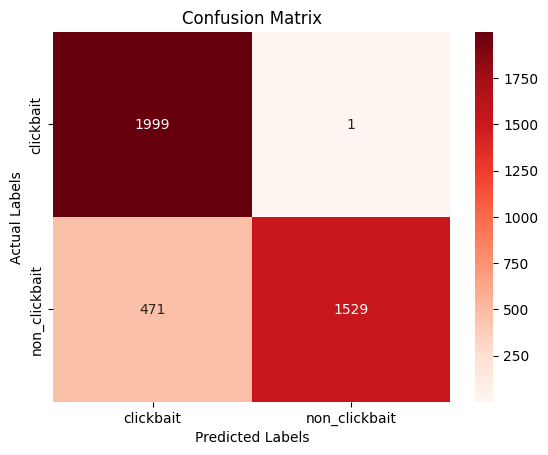

In [4]:
import pvml
import build_vocabulary as bv
import features_extraction as fe
import make_statistics as ms
voc = bv.get_vocabulary(path='../dataset/', numWords=7000, save=False)
X_train, Y_train,classes = fe.get_bow_representation(voc,getClasses=True)
X_test, Y_test = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_test.txt',
                                             clickbait_path='../dataset/clickbait_test.txt')

w, b = pvml.multinomial_naive_bayes_train(X_train, Y_train)
b=[4, -5]

accuracy_train=(predictions_train==Y_train).mean()

predictions_test, score = pvml.multinomial_naive_bayes_inference(
    X_test, w, b)
accuracy_test=(predictions_test==Y_test).mean()
print('Test accuracy: ',accuracy_test*100)
true_positive, true_negative, false_positive, false_negative, false_positive_rate=ms.calculate_metrics(Y_test, predictions_test)
print('False positive: ',false_positive_rate*100)
ms.plot_confusion_matrix(Y_test, predictions_test, classes)